**Atualizando a biblioteca para plotagem de gráficos**


In [ ]:
!pip -q install plotly --upgrade

**Importando bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

**Abrindo um arquivo CSV do drive**

In [ ]:
base = pd.read_csv('/content/sample_data/restaurantev2.csv', sep=';', encoding = 'latin1')

In [ ]:
#base = base.drop(columns = ['Exemplo'])


**Você também pode carregar seu arquivo e já selecionar as colunas que desejar... investigue esta função**

In [ ]:
#base2 = pd.read_csv('/content/sample_data/restaurante.csv', ';', usecols=['Alternativo', 'Bar'])
#base2

In [ ]:
base

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10,Sim
1,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60,Nao
2,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10,Sim
3,Sim,Nao,Sim,Sim,Cheio,R,Sim,Nao,Tailandes,10-30,Sim
4,Sim,Nao,Sim,Nao,Cheio,RRR,Nao,Sim,Frances,>60,Nao
5,Nao,Sim,Nao,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,Nao,Sim,Nao,Nao,Nenhum,R,Sim,Nao,Hamburger,0-10,Nao
7,Nao,Nao,Nao,Sim,Alguns,RR,Sim,Sim,Tailandes,0-10,Sim
8,Nao,Sim,Sim,Nao,Cheio,R,Sim,Nao,Hamburger,>60,Nao
9,Sim,Sim,Sim,Sim,Cheio,RRR,Nao,Sim,Italiano,10-30,Nao


In [ ]:
base.head(3)

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10,Sim
1,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60,Nao
2,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10,Sim


In [ ]:
base.tail(2)

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
10,Nao,Nao,Nao,Nao,Nenhum,R,Nao,Nao,Tailandes,0-10,Nao
11,Sim,Sim,Sim,Sim,Cheio,R,Nao,Nao,Hamburger,30-60,Sim


**Contando quantidade de instâncias**


In [ ]:
np.unique(base['Conclusao'], return_counts=True)

(array(['Nao', 'Sim'], dtype=object), array([6, 6]))

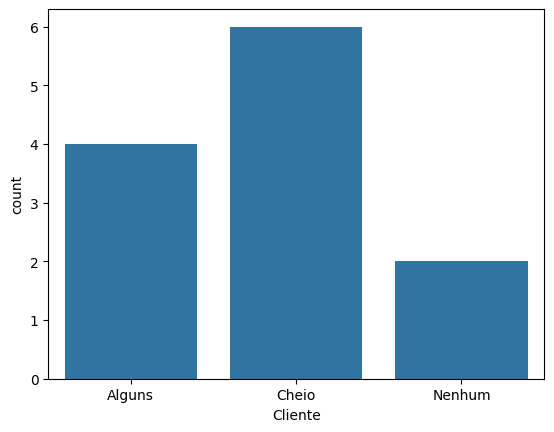

In [ ]:
sns.countplot(x = base['Cliente']);

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#para codificar todos os atributos para laberEncoder de uma única vez
#base_encoded = base.apply(LabelEncoder().fit_transform)
cols_label_encode = ['Alternativo', 'Bar', 'SexSab','fome', 'Cliente','Preco', 'Chuva', 'Res', 'Tipo', 'Tempo']
base[cols_label_encode] = base[cols_label_encode].apply(LabelEncoder().fit_transform)

In [ ]:
base

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,1,0,0,1,0,2,0,1,0,0,Sim
1,1,0,0,1,1,0,0,0,3,2,Nao
2,0,1,0,0,0,0,0,0,1,0,Sim
3,1,0,1,1,1,0,1,0,3,1,Sim
4,1,0,1,0,1,2,0,1,0,3,Nao
5,0,1,0,1,0,1,1,1,2,0,Sim
6,0,1,0,0,2,0,1,0,1,0,Nao
7,0,0,0,1,0,1,1,1,3,0,Sim
8,0,1,1,0,1,0,1,0,1,3,Nao
9,1,1,1,1,1,2,0,1,2,1,Nao




>** OneHotEncoder - Agora vamos binarizar atributos não ordinais**

**Contando quantas opções de resposta tem cada atributo**

In [ ]:
#len(np.unique(base['Tipo']))

In [ ]:
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.compose import ColumnTransformer

In [ ]:
#cols_onehot_encode = ['Tipo']

# Aplicar o OneHotEncoder apenas nas colunas especificadas
#base_encoded = ColumnTransformer(
  #  transformers=[('onehot', OneHotEncoder(), cols_onehot_encode)],
  #  remainder='passthrough'
# ).fit_transform(base)

In [ ]:
#base_encoded

In [ ]:
#base_encoded.shape

**Separar o dataset em variáveis independentes (X_prev) e dependentes (y_classe)**

In [ ]:
X_prev= base.iloc[:, :-1]  # Supondo que a última coluna seja o target
y_classe = base.iloc[:, -1]

**Método de amostragem Holdout**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_prev

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo
0,1,0,0,1,0,2,0,1,0,0
1,1,0,0,1,1,0,0,0,3,2
2,0,1,0,0,0,0,0,0,1,0
3,1,0,1,1,1,0,1,0,3,1
4,1,0,1,0,1,2,0,1,0,3
5,0,1,0,1,0,1,1,1,2,0
6,0,1,0,0,2,0,1,0,1,0
7,0,0,0,1,0,1,1,1,3,0
8,0,1,1,0,1,0,1,0,1,3
9,1,1,1,1,1,2,0,1,2,1


In [ ]:
y_classe

,Conclusao
0,Sim
1,Nao
2,Sim
3,Sim
4,Nao
5,Sim
6,Nao
7,Sim
8,Nao
9,Nao


In [ ]:
y_classe.shape

(12,)

In [ ]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 0)

In [ ]:
X_treino.shape

(9, 10)

In [ ]:
X_teste.shape

(3, 10)

In [ ]:
X_teste

,Alternativo,Bar,SexSab,fome,Cliente,Preco,Chuva,Res,Tipo,Tempo
6,0,1,0,0,2,0,1,0,1,0
11,1,1,1,1,1,0,0,0,1,2
4,1,0,1,0,1,2,0,1,0,3


In [ ]:
y_treino

,Conclusao
10,Nao
2,Sim
8,Nao
1,Nao
7,Sim
9,Nao
3,Sim
0,Sim
5,Sim


In [ ]:
y_teste

,Conclusao
6,Nao
11,Sim
4,Nao


In [ ]:
import pickle

In [ ]:
with open('/content/sample_data/RestauranteAtual.pkl', mode = 'wb') as f:
  pickle.dump([X_treino, X_teste, y_treino, y_teste], f)